##### Aby uruchomić poniższy kod, należy użyć pip:
###### pipenv install - aby zainstalować wszystkie potrzebne biblioteki i zależności
###### pipenv shell - aby wybrać to środowisko wirtualne
###### pipenv --rm - aby usunąć środowisko wirtualne/kernel po zakończeniu instalacji

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### Otwarcie pliku Excel i wykonanie kopii, aby zachować oryginał w razie jakichkolwiek problemów

In [2]:
oryginał = pd.read_csv("./netflix_tytuły.csv")
surowe_dane = oryginał.copy()

##### Sprawdzanie szczegółów dataframe'u

In [3]:
surowe_dane.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [4]:
surowe_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


##### Czyszczenie danych - kroki podstawowe

###### Usunięcie kolumn, które nie będą mi potrzebne

In [5]:
surowe_dane.drop(columns=["title", "cast", "show_id", "release_year", "rating", "duration", "description"], inplace=True)

###### Przetłumaczenie nazw kolumn

In [6]:
surowe_dane.rename(columns={"type":"typ", "director":"reżyser", "country":"kraj", "date_added":"data_dodania",
                            "listed_in":"wymieniony_w"}, inplace=True)

###### Usuwanie wszystkich przerw i dodatkowych przecinków dla wartości tekstowych

In [7]:
for kolumna in surowe_dane.columns:
    surowe_dane[kolumna] = surowe_dane[kolumna].map(lambda x: x.strip(",| ") if type(x) == str else x)

##### Czyszczenie danych - kolumna kluczowa

###### Wybranie wierszy, które nie posiadają wartości NaN w kolumnie data_dodania

In [8]:
surowe_dane = surowe_dane[surowe_dane["data_dodania"].notna()]

###### dodanie kolumn rok, miesiąc i dzień, dodatkowo zmiana typu kolumny data_dodania na datę

In [9]:
##Zmiana typu kolumny
surowe_dane["data_dodania"] = pd.to_datetime(surowe_dane["data_dodania"])

##dodanie kolumn
surowe_dane["rok"] = pd.to_datetime(surowe_dane["data_dodania"]).dt.year
surowe_dane["miesiąc"] = pd.to_datetime(surowe_dane["data_dodania"]).dt.month
surowe_dane["dzień"] = pd.to_datetime(surowe_dane["data_dodania"]).dt.day

##sprawdzenie czy wszystko jest poprawne
print(surowe_dane["rok"].unique())
print(surowe_dane["miesiąc"].unique())
print(surowe_dane["dzień"].unique())

surowe_dane

[2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2009 2008 2010]
[ 9  8  7  6  5  4  3  2  1 12 11 10]
[25 24 23 22 21 20 19 17 16 15 14 11 10  9  8  7  6  5  4  3  2  1 31 29
 28 27 26 18 13 12 30]


,typ,reżyser,kraj,data_dodania,wymieniony_w,rok,miesiąc,dzień
0,Movie,Kirsten Johnson,United States,2021-09-25,Documentaries,2021,9,25
1,TV Show,NaN,South Africa,2021-09-24,"International TV Shows, TV Dramas, TV Mysteries",2021,9,24
2,TV Show,Julien Leclercq,NaN,2021-09-24,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24
3,TV Show,NaN,NaN,2021-09-24,"Docuseries, Reality TV",2021,9,24
4,TV Show,NaN,India,2021-09-24,"International TV Shows, Romantic TV Shows, TV ...",2021,9,24
...,...,...,...,...,...,...,...,...
8802,Movie,David Fincher,United States,2019-11-20,"Cult Movies, Dramas, Thrillers",2019,11,20
8803,TV Show,NaN,NaN,2019-07-01,"Kids' TV, Korean TV Shows, TV Comedies",2019,7,1
8804,Movie,Ruben Fleischer,United States,2019-11-01,"Comedies, Horror Movies",2019,11,1
8805,Movie,Peter Hewitt,United States,2020-01-11,"Children & Family Movies, Comedies",2020,1,11


###### Changing the order of the columns

In [10]:
surowe_dane = surowe_dane[["typ", "reżyser", "kraj", "data_dodania", "rok", "miesiąc", "dzień", "wymieniony_w"]]

In [11]:
surowe_dane

,typ,reżyser,kraj,data_dodania,rok,miesiąc,dzień,wymieniony_w
0,Movie,Kirsten Johnson,United States,2021-09-25,2021,9,25,Documentaries
1,TV Show,NaN,South Africa,2021-09-24,2021,9,24,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Julien Leclercq,NaN,2021-09-24,2021,9,24,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,NaN,NaN,2021-09-24,2021,9,24,"Docuseries, Reality TV"
4,TV Show,NaN,India,2021-09-24,2021,9,24,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...
8802,Movie,David Fincher,United States,2019-11-20,2019,11,20,"Cult Movies, Dramas, Thrillers"
8803,TV Show,NaN,NaN,2019-07-01,2019,7,1,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Movie,Ruben Fleischer,United States,2019-11-01,2019,11,1,"Comedies, Horror Movies"
8805,Movie,Peter Hewitt,United States,2020-01-11,2020,1,11,"Children & Family Movies, Comedies"


##### Sprawdzenie pozostałych kolumn dla ułatwienia przyszłej analizy

######  Ponieważ chcemy sprawdzić te same dane dla większości kolumn, stworzyłem funkcję, która zadziała na wszystkie kolumny tekstowe

###### Pobiera ona wszystkie wartości notna z kolumny, następnie sprawdza, czy wszystkie wartości tekstowe są alfabetyczne, czy nie, a na koniec filtruje kolumnę z ręcznie wpisanymi wartościami, które są najczęściej używanymi nieznanymi wartościami

In [12]:
def sprawdzenie(nazwa_kolumny):
    tymcz = surowe_dane.loc[surowe_dane[nazwa_kolumny].notna(), nazwa_kolumny]
    alfa = tymcz[tymcz.str.replace("\W", "", regex=True).str.isalpha()]
    niealfa = tymcz[~tymcz.str.replace("\W", "", regex=True).str.isalpha()]
    dodfiltr = tymcz.isin(["N/A", "Not-Applicable", "Not/Applicable", "n/a", "na", "Unknown",
                        "Unknown / Not-Applicable", "Unknown / Non-Applicable", "Unknown/Not-Applicable", 
                        "Unknown/Non-Applicable"]).value_counts()
    return print("--Liczba wierszy-- \n\n {}".format(tymcz.shape[0]), "\n\n",
                 "--Liczba wierszy (Bez najczęściej używanych nieznanych wartości)--\n\n {}".format(dodfiltr), "\n\n", 
                 "--Alfabetyczne--\n\n {}".format(alfa),  "\n\n", 
                 "--Niealfabetyczne--\n\n {}".format(niealfa))

###### Sprawdzenie kolumny typu. Ponieważ istnieją tylko 2 typy wartości, nie ma potrzeby stosowania funkcji

In [13]:
surowe_dane["typ"].unique()

array(['Movie', 'TV Show'], dtype=object)

###### Sprawdzenie kolumny reżyser. Jest dużo unikalnych wartości, więc najlepiej zastosować funkcję.

###### Wartości wydają się być w porządku, jest 1 wartość nie alfabetyczna, jednak po sprawdzeniu nazwy okazuje się, że jest to reżyser

In [14]:
sprawdzenie("reżyser")

--Liczba wierszy-- 

 6173 

 --Liczba wierszy (Bez najczęściej używanych nieznanych wartości)--

 False    6173
Name: reżyser, dtype: int64 

 --Alfabetyczne--

 0                     Kirsten Johnson
2                     Julien Leclercq
5                       Mike Flanagan
6       Robert Cullen, José Luis Ucha
7                        Haile Gerima
                    ...              
8801                  Majid Al Ansari
8802                    David Fincher
8804                  Ruben Fleischer
8805                     Peter Hewitt
8806                      Mozez Singh
Name: reżyser, Length: 6172, dtype: object 

 --Niealfabetyczne--

 1053    One9
Name: reżyser, dtype: object


###### Checking the kraj column. Everything appears to be correct

In [15]:
sprawdzenie("kraj")

--Liczba wierszy-- 

 7967 

 --Liczba wierszy (Bez najczęściej używanych nieznanych wartości)--

 False    7967
Name: kraj, dtype: int64 

 --Alfabetyczne--

 0                                           United States
1                                            South Africa
4                                                   India
7       United States, Ghana, Burkina Faso, United Kin...
8                                          United Kingdom
                              ...                        
8801                         United Arab Emirates, Jordan
8802                                        United States
8804                                        United States
8805                                        United States
8806                                                India
Name: kraj, Length: 7967, dtype: object 

 --Niealfabetyczne--

 Series([], Name: kraj, dtype: object)


###### Reviewing the listed in column. Here also everything appears to be correct

In [16]:
sprawdzenie("wymieniony_w")

--Liczba wierszy-- 

 8797 

 --Liczba wierszy (Bez najczęściej używanych nieznanych wartości)--

 False    8797
Name: wymieniony_w, dtype: int64 

 --Alfabetyczne--

 0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: wymieniony_w, Length: 8797, dtype: object 

 --Niealfabetyczne--

 Series([], Name: wymieniony_w, dtype: object)


##### Ostatnie kroki

###### Dzielenie tabeli na 2 osobne tabele - Filmy i programy telewizyjne

In [17]:
surower_dane_filmy = surowe_dane[surowe_dane["typ"] == "Movie"]
surowe_dane_pro = surowe_dane[surowe_dane["typ"] == "TV Show"]

In [18]:
surower_dane_filmy.head(2)

,typ,reżyser,kraj,data_dodania,rok,miesiąc,dzień,wymieniony_w
0,Movie,Kirsten Johnson,United States,2021-09-25,2021,9,25,Documentaries
6,Movie,"Robert Cullen, José Luis Ucha",NaN,2021-09-24,2021,9,24,Children & Family Movies


In [19]:
surowe_dane_pro.head(2)

,typ,reżyser,kraj,data_dodania,rok,miesiąc,dzień,wymieniony_w
1,TV Show,NaN,South Africa,2021-09-24,2021,9,24,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Julien Leclercq,NaN,2021-09-24,2021,9,24,"Crime TV Shows, International TV Shows, TV Act..."


###### Resetowanie indeksów dla obu dataframe'ów

In [20]:
wycz_pro = surowe_dane_pro.reset_index(drop=True)
wycz_film = surower_dane_filmy.reset_index(drop=True)

###### Eksportowanie danych do plików csv w przypadku jakichkolwiek problemów i do wykorzystania w przyszłości

In [21]:
wycz_pro.to_csv("Netflix_Programy.csv")
wycz_film.to_csv("Netflix_Filmy.csv")

##### Analiza - Filmy

###### Najpierw sprawdzenie, ile filmów dodano w poszczególnych latach

In [22]:
rok_po_roku_filmy = wycz_film.groupby("rok")[["typ"]].agg(
    liczba_filmów = pd.NamedAgg(column="typ", aggfunc="count")).sort_values("liczba_filmów", ascending=False)

rok_po_roku_filmy.sort_index(ascending=False)

,liczba_filmów
rok,
2021,993
2020,1284
2019,1424
2018,1237
2017,839
2016,253
2015,56
2014,19
2013,6


###### Sprawdzanie wartości w innych kolumnach

In [23]:
##Ponieważ dla następnych kolumn będę wykonywał te same kroki, utworzyłem funkcję

def grupy_lat_filmy(nazwa_kolumny):
    """
    ----IMPORTANT----
    nazwa_kolumny musi być tekstem, np. "wymieniony_w" nie wymieniony_w

    Najpierw wyodrębniamy wartości not na
    """
    niena = wycz_film[wycz_film[nazwa_kolumny].notna()].copy()
    """
    Teraz, ponieważ niektóre filmy mają wiele wartości w kolumnach, będziemy musieli użyć funkcji explode.
    Ponieważ jednak explode działa tylko na listach, a nie na tekście, musimy najpierw przekonwertować tekst na listy.
    Na szczęście w tej sytuacji funkcja split wystarczy, aby przekonwertować je na listy.
    """
    niena[nazwa_kolumny] = niena[nazwa_kolumny].map(lambda x: x.split(", "))
    nienav2 = niena.explode(nazwa_kolumny)
    """
    Potem tylko podwójnie sprawdzamy, czy nie ma wartości na
    """
    nienav2 = nienav2[nienav2[nazwa_kolumny].notna()]
    """
    Po użyciu funkcji explode, grupujemy wartości według lat i konkretnej kolumny, i liczymy ilość filmów 
    """
    liczba_rok = nienav2.groupby(["rok", nazwa_kolumny], as_index=False)[["typ"]].agg(
    liczba_filmów = pd.NamedAgg(column="typ", aggfunc="count"))
    """
    Następnie chcemy wziąć tylko największą liczbę filmów dla każdego roku
    """
    najliczba_rok = liczba_rok.groupby("rok",as_index=False)[["liczba_filmów"]].agg(
    liczba_filmów = pd.NamedAgg(column="liczba_filmów", aggfunc="max"))
    """
    Kiedy to zrobimy, połączymy dwa dataframe'y. Zrobimy to tak, że zduplikowane wartości będą nadal
    będą widoczne. Na przykład, jeśli najwyższa liczba filmów dla danego roku dla dwóch lub więcej kategorii
    jest taka sama, pokazujemy wszystkie te kategorie, zamiast tylko jednej.
    """
    wynik = liczba_rok.merge(najliczba_rok, left_on=["rok", "liczba_filmów"], 
    right_on=["rok", "liczba_filmów"])
    return wynik

###### Najpierw sprawdzam, które kategorie miały najwięcej filmów dodanych w poszczególnych latach

In [24]:
filmy_kategoria = grupy_lat_filmy("wymieniony_w")
filmy_kategoria

,rok,wymieniony_w,liczba_filmów
0,2008,Dramas,1
1,2008,Independent Movies,1
2,2008,Thrillers,1
3,2009,Dramas,1
4,2009,Horror Movies,1
5,2009,International Movies,1
6,2010,Cult Movies,1
7,2010,Horror Movies,1
8,2011,Dramas,13
9,2012,Comedies,2


###### Następnie sprawdzam jaki był najczęstszy kraj produkcji każdego roku

In [25]:
filmy_kraj = grupy_lat_filmy("kraj")
filmy_kraj

,rok,kraj,liczba_filmów
0,2008,United States,1
1,2009,Denmark,1
2,2009,United States,1
3,2010,United States,1
4,2011,United States,12
5,2012,United States,3
6,2013,United States,5
7,2014,United States,18
8,2015,United States,41
9,2016,United States,139


###### Potem sprawdzam, który reżyser miał najwięcej filmów dodanych każdego roku

In [26]:
filmy_reżyser = grupy_lat_filmy("reżyser")
filmy_reżyser

,rok,reżyser,liczba_filmów
0,2008,Sorin Dan Mihalcescu,1
1,2009,Joe Dante,1
2,2009,Ole Bornedal,1
3,2010,Jim Monaco,1
4,2011,Arthur Allan Seidelman,1
5,2011,Buzz Kulik,1
6,2011,Eric Laneuville,1
7,2011,Icíar Bollaín,1
8,2011,Joel Oliansky,1
9,2011,John Herzfeld,1


###### Na koniec sprawdzenie ogólnych wartości top 1 dla filmów dla kraju, reżysera i kategorii

In [27]:
##Stworzyłem funkcję, która ma pokazać top 1 wartości dla każdej kolumny. Ponieważ stosuję ten sam
##proces do każdej kolumny, stworzyłem funkcję.
def filmy_ogólnie(kraj, reżyser, kategoria):
    """
        ----IMPORTANT----
    kraj, reżyser, kategoria muszą być poniższym tekstem:
    "kraj", "reżyser", "wymieniony_w"
    """

    """
    Pierwsze 4 linie są tymi samymi liniami, które zostały użyte w poprzedniej funkcji
    """
    kr = wycz_film[wycz_film[kraj].notna()].copy()
    kr[kraj] = kr[kraj].map(lambda x: x.split(", "))
    krv2 = kr.explode(kraj)
    krv2 = krv2[krv2[kraj].notna()]
    """
    Gdy mamy już tabelę, możemy ją pogrupować według określonej kolumny, zresetować indeks
    a następnie wybrać tylko te wiersze, które mają maksymalną wartość w kolumnie "liczba".
    """
    f_kr = krv2.groupby(kraj)[["typ"]].agg(liczba = pd.NamedAgg(column="typ", aggfunc="count")
                                             ).reset_index()
    f_kr = f_kr[f_kr["liczba"] == f_kr["liczba"].max()]


    """
    Ten sam proces jak powyżej dotyczy pozostałych 2 kolumn
    """
    reż = wycz_film[wycz_film[reżyser].notna()].copy()
    reż[reżyser] = reż[reżyser].map(lambda x: x.split(", "))
    reżv2 = reż.explode(reżyser)
    reżv2 = reżv2[reżv2[reżyser].notna()]
    f_reż = reżv2.groupby(reżyser)[["typ"]].agg(liczba = pd.NamedAgg(column="typ", aggfunc="count")
                                             ).reset_index()
    f_reż = f_reż[f_reż["liczba"] == f_reż["liczba"].max()]


    kat = wycz_film[wycz_film[kategoria].notna()].copy()
    kat[kategoria] = kat[kategoria].map(lambda x: x.split(", "))
    katv2 = kat.explode(kategoria)
    katv2 = katv2[katv2[kategoria].notna()]
    f_kat = katv2.groupby(kategoria)[["typ"]].agg(liczba = pd.NamedAgg(column="typ", aggfunc="count")
                                             ).reset_index()
    f_kat = f_kat[f_kat["liczba"] == f_kat["liczba"].max()]

    return print("--Najczęstszy kraj--\n\n {}".format(f_kr), "\n\n",
                 "--Najczęstszy reżyser--\n\n {}".format(f_reż), "\n\n",
                 "--Najczęstsza kategoria--\n\n {}".format(f_kat))

In [28]:
filmy_ogólnie("kraj", "reżyser", "wymieniony_w")

--Najczęstszy kraj--

               kraj  liczba
110  United States    2752 

 --Najczęstszy reżyser--

             reżyser  liczba
3582  Rajiv Chilaka      22 

 --Najczęstsza kategoria--

             wymieniony_w  liczba
11  International Movies    2752


##### Analiza - Programy telewizyjne. Proces jest taki sam jak w przypadku dataframe'u na filmy

###### Najpierw sprawdzenie ile programów zostało dodanych w każdym roku

In [29]:
rok_po_roku_pro = wycz_pro.groupby("rok")[["typ"]].agg(
    liczba_programów = pd.NamedAgg(column="typ", aggfunc="count")).sort_values("liczba_programów", ascending=False)

rok_po_roku_pro.sort_index(ascending=False)

,liczba_programów
rok,
2021,505
2020,595
2019,592
2018,412
2017,349
2016,176
2015,26
2014,5
2013,5


###### Modyfikacja poprzedniej funkcji tak, aby odnosiła się do dataframe'u programów

In [30]:
##Użycie tych samych funkcji co w przypadku filmów

def grupy_lat_programy(nazwa_kolumny):
    niena = wycz_pro[wycz_pro[nazwa_kolumny].notna()].copy()
    niena[nazwa_kolumny] = niena[nazwa_kolumny].map(lambda x: x.split(", "))
    nienav2 = niena.explode(nazwa_kolumny)
    nienav2 = nienav2[nienav2[nazwa_kolumny].notna()]
    liczba_rok = nienav2.groupby(["rok", nazwa_kolumny], as_index=False)[["typ"]].agg(
    liczba_programów = pd.NamedAgg(column="typ", aggfunc="count"))
    najliczba_rok = liczba_rok.groupby("rok",as_index=False)[["liczba_programów"]].agg(
    liczba_programów = pd.NamedAgg(column="liczba_programów", aggfunc="max"))
    wynik = liczba_rok.merge(najliczba_rok, left_on=["rok", "liczba_programów"], 
    right_on=["rok", "liczba_programów"])
    return wynik

###### First, I'm taking a look at which kategories that had the most movies added in each rok

In [31]:
pro_kategoria = grupy_lat_programy("wymieniony_w")
pro_kategoria

,rok,wymieniony_w,liczba_programów
0,2008,Stand-Up Comedy & Talk Shows,1
1,2013,TV Dramas,4
2,2014,TV Comedies,3
3,2014,TV Dramas,3
4,2015,Kids' TV,9
5,2016,International TV Shows,86
6,2017,International TV Shows,205
7,2018,International TV Shows,214
8,2019,International TV Shows,335
9,2020,International TV Shows,277


###### Then I check what was the most common kraj of production each rok

In [32]:
pro_kraj = grupy_lat_programy("kraj")
pro_kraj

,rok,kraj,liczba_programów
0,2008,United States,1
1,2013,United States,5
2,2014,United States,4
3,2015,United States,16
4,2016,United States,64
5,2017,United States,98
6,2018,United States,145
7,2019,United States,178
8,2020,United States,246
9,2021,United States,175


###### Next, I check which reżyser had the most movies added each rok

In [33]:
pro_reżyser = grupy_lat_programy("reżyser")
pro_reżyser

,rok,reżyser,liczba_programów
0,2013,Stuart Orme,1
1,2015,Alastair Fothergill,2
2,2016,Alastair Fothergill,1
3,2016,David Schalko,1
4,2016,Ehtesham Uddin,1
...,...,...,...
126,2020,Vijay S. Bhanushali,1
127,2020,Wouter Bouvijn,1
128,2020,Ziad Doueiri,1
129,2021,Hsu Fu-chun,2


###### Na koniec sprawdzenie ogólnych wartości top 1 dla programów telewizyjnych dla kraju, reżysera i kategorii

In [34]:
##Używam tej samej funkcji dla wartości ogólnych, co poprzednio, tylko źródłowy dataframe został zmieniona z
##wycz_film to wycz_pro
def programy_ogólnie(kraj, reżyser, kategoria):
    kr = wycz_pro[wycz_pro[kraj].notna()].copy()
    kr[kraj] = kr[kraj].map(lambda x: x.split(", "))
    krv2 = kr.explode(kraj)
    krv2 = krv2[krv2[kraj].notna()]
    f_kr = krv2.groupby(kraj)[["typ"]].agg(liczba = pd.NamedAgg(column="typ", aggfunc="count")
                                             ).reset_index()
    f_kr = f_kr[f_kr["liczba"] == f_kr["liczba"].max()]


    reż = wycz_pro[wycz_pro[reżyser].notna()].copy()
    reż[reżyser] = reż[reżyser].map(lambda x: x.split(", "))
    reżv2 = reż.explode(reżyser)
    reżv2 = reżv2[reżv2[reżyser].notna()]
    f_reż = reżv2.groupby(reżyser)[["typ"]].agg(liczba = pd.NamedAgg(column="typ", aggfunc="count")
                                             ).reset_index()
    f_reż = f_reż[f_reż["liczba"] == f_reż["liczba"].max()]


    kat = wycz_pro[wycz_pro[kategoria].notna()].copy()
    kat[kategoria] = kat[kategoria].map(lambda x: x.split(", "))
    katv2 = kat.explode(kategoria)
    katv2 = katv2[katv2[kategoria].notna()]
    f_kat = katv2.groupby(kategoria)[["typ"]].agg(liczba = pd.NamedAgg(column="typ", aggfunc="count")
                                             ).reset_index()
    f_kat = f_kat[f_kat["liczba"] == f_kat["liczba"].max()]

    return print("--Najczęstszy kraj--\n\n {}".format(f_kr), "\n\n",
                 "--Najczęstszy reżyser--\n\n {}".format(f_reż), "\n\n",
                 "--Najczęstsza kategoria--\n\n {}".format(f_kat))

In [35]:
programy_ogólnie("kraj", "reżyser", "wymieniony_w")

--Najczęstszy kraj--

              kraj  liczba
62  United States     932 

 --Najczęstszy reżyser--

                  reżyser  liczba
8    Alastair Fothergill       3
146            Ken Burns       3 

 --Najczęstsza kategoria--

              wymieniony_w  liczba
5  International TV Shows    1350


##### Wizualizacje

###### Wykresy pokazujące zmianę ilości filmów i programów telewizyjnych dodawanych rok po roku

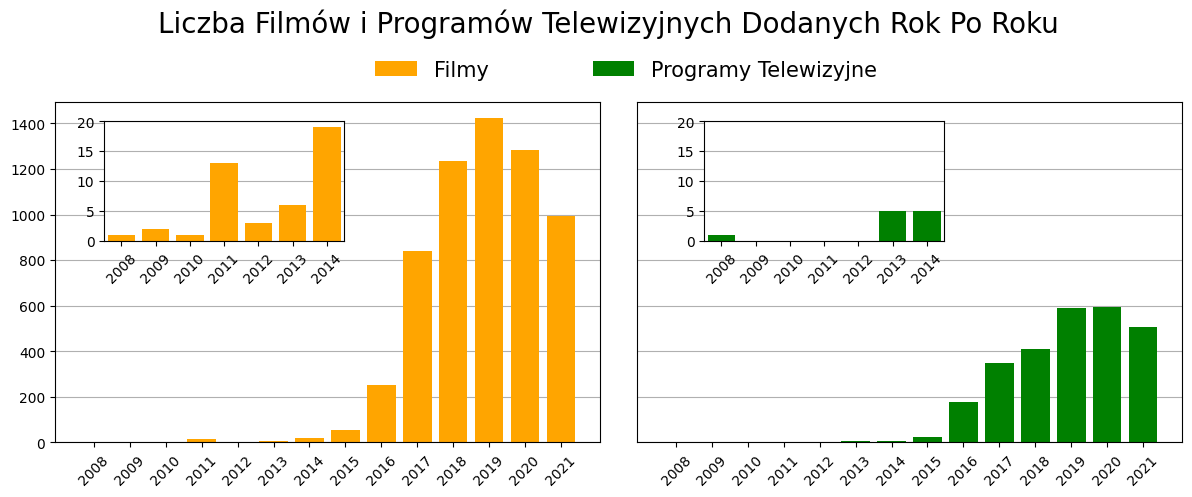

In [36]:
##Przede wszystkim tworzę subploty i dostosowuję rozmiar i układ figury, a także upewniam się, że oba wykresy mają
##te same wartości osi x i y
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4), sharey=True, sharex=True)
fig.tight_layout()

##Ustalam tytuł wykresów
fig.suptitle("Liczba Filmów i Programów Telewizyjnych Dodanych Rok Po Roku", y=1.18, fontsize=20)

#Teraz tworzę wykres słupkowy i modyfikuję znaczniki osi, ponieważ te domyślne nie były najlepsze
##Włączam też siatkę wykresue i ustawiam ją pod słupkami
ax[0].bar(rok_po_roku_filmy.index, rok_po_roku_filmy["liczba_filmów"], color="orange", label="Filmy")
ax[0].set_xticks(rok_po_roku_filmy.index)
ax[0].set_xticklabels(rok_po_roku_filmy.index,rotation=45)
ax[0].grid(visible=True, which="major", axis="y")
ax[0].set_axisbelow(True)

##Przybliżam lata 2008-2014, aby pokazać małe wartości
ax0zoom = fig.add_axes([0.08,0.6,0.2,0.3])
ax0zoom.bar(rok_po_roku_filmy.index, rok_po_roku_filmy["liczba_filmów"], color="orange")
ax0zoom.set_xticks(ax[0].get_xticks())
ax0zoom.set_xticklabels(ax[0].get_xticks(), rotation=45)
ax0zoom.set_xlim(2007.5,2014.5)
ax0zoom.set_ylim(0,20)
ax0zoom.grid(visible=True, which="major", axis="y")
ax0zoom.set_axisbelow(True)

##Wykonuję ten sam proces dla drugiego wykresu z dodatkową funkcją tick_params, aby usunąć znaczniki osi
ax[1].bar(rok_po_roku_pro.index, rok_po_roku_pro["liczba_programów"], color="green", label="Programy Telewizyjne")
ax[1].tick_params(axis="y", left=False)
ax[1].grid(visible=True, which="major", axis="y")
ax[1].set_axisbelow(True)
ax[1].set_xticklabels(ax[0].get_xticks() ,rotation=45)

##Jak powyżej, przybliżam lata 2008-2014, aby pokazać małe wartości
ax1zoom = fig.add_axes([0.58,0.6,0.2,0.3])
ax1zoom.bar(rok_po_roku_pro.index, rok_po_roku_pro["liczba_programów"], color="green")
ax1zoom.set_xticks(ax[0].get_xticks())
ax1zoom.set_xticklabels(ax[0].get_xticks(), rotation=45)
ax1zoom.set_xlim(2007.5,2014.5)
ax1zoom.set_ylim(0,20)
ax1zoom.grid(visible=True, which="major", axis="y")
ax1zoom.set_axisbelow(True)

##Tutaj dostosowuję tylko legendę i pokazuję wykres.
fig.legend(ncols=2, fontsize=15, frameon=False, loc="upper center", bbox_to_anchor=(0.515,1.1), columnspacing=5)
plt.show();

###### Wykresy przedstawiające najczęstszy/e kraj/e produkcji filmów i programów telewizyjnych rok po roku

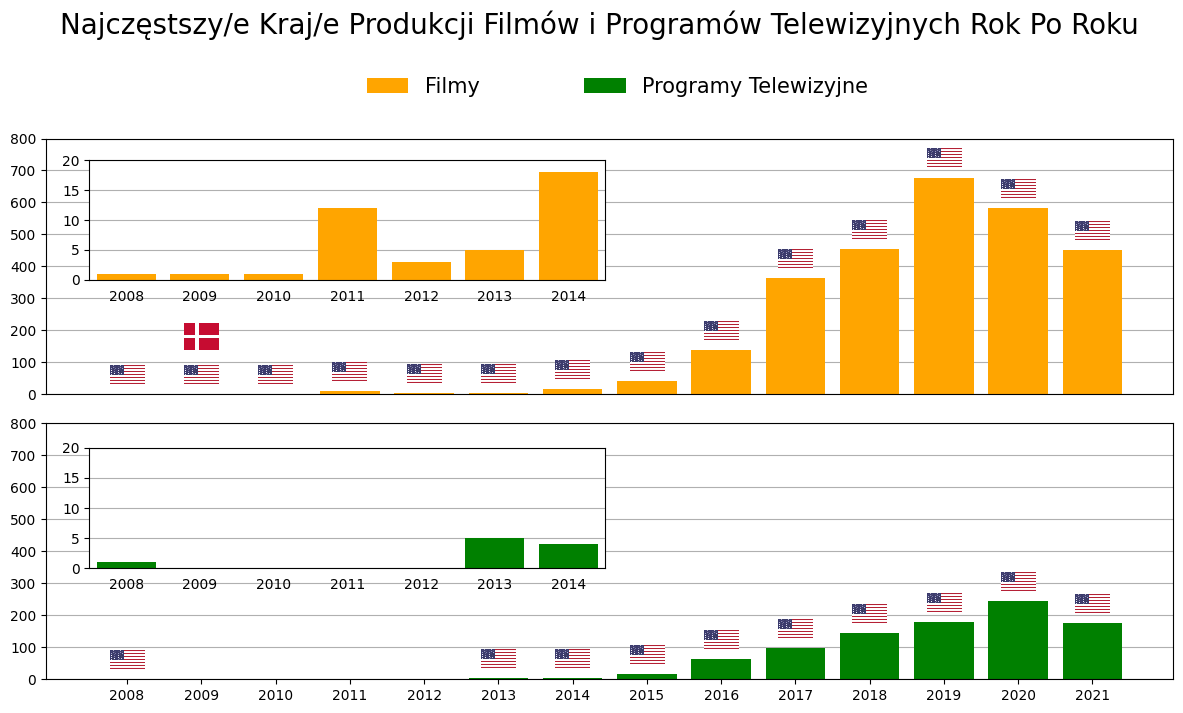

In [37]:
##Po pierwsze, aby zrobić to, co chcę, musimy zaimportować dwa dodatkowe moduły
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

##Następnie, tworzę subploty i dostosowuję rozmiar i układ figury, a także upewniam się, że oba grafy mają
##te same wartości osi x i y
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12,6), sharex=True, sharey=True)
fig.tight_layout()

##Ustalam tytuł wykresów
fig.suptitle("Najczęstszy/e Kraj/e Produkcji Filmów i Programów Telewizyjnych Rok Po Roku", y=1.18, fontsize=20)

#Teraz tworzę wykres słupkowy i modyfikuję znaczniki osi, ponieważ te domyślne nie były najlepsze
##Włączam też siatkę wykresów i ustawiam ją pod słupkami
ax[0].bar(filmy_kraj["rok"], filmy_kraj["liczba_filmów"], color="orange", label="Filmy")
ax[0].set_xticks(filmy_kraj["rok"])
ax[0].set_ylim(0,800)
ax[0].set_xticks(filmy_kategoria["rok"].unique())
ax[0].set_xticklabels(filmy_kategoria["rok"].unique())
ax[0].grid(visible=True, which="major", axis="y")
ax[0].set_axisbelow(True)
ax[0].tick_params(axis="x", bottom=False)

##Przybliżam lata 2008-2014, aby pokazać małe wartości
ax0zoom = fig.add_axes([0.075,0.73,0.43,0.2])
ax0zoom.bar(filmy_kraj["rok"], filmy_kraj["liczba_filmów"], color="orange")
ax0zoom.set_xticks(ax[0].get_xticks())
ax0zoom.set_xticklabels(ax[0].get_xticks())
ax0zoom.tick_params(axis="x", bottom=False)
ax0zoom.set_xlim(2007.5,2014.5)
ax0zoom.set_ylim(0,20)
ax0zoom.grid(visible=True, which="major", axis="y")
ax0zoom.set_axisbelow(True)

##Ponieważ chcę pokazać flagi państw z tabeli, musimy użyć naszych dwóch importowanych modułów.
##Dodałem je do funkcji, więc można je później wykorzystać w pętli for.
##Odczytujemy obrazek na podstawie nazwy pliku, czyli nazwa kraju.
##Następnie używamy modułu OffsetImage, więc możemy manipulować wielkością obrazków.
##Potem upewniamy się, za pomocą AnnotationBbos, 
##że załadowany obrazek jest umieszczony na wykresie w odpowiedniej pozycji w oparciu o osie x i y wykresu.
##Na koniec dodajemy ten obrazek do osi
def OffsetiAnnotacja(x, y, kraj, ax):
    """
    Nazwa musi być w cudzysłowie, np. "Denmark" zamiast Denmark
    """
    obrazek = plt.imread("./{}.jpg".format(kraj))
    obr = OffsetImage(obrazek, zoom=0.025)
    annotacja = AnnotationBbox(obr, (x, y+60), frameon=False)
    ax.add_artist(annotacja)

##Po utworzeniu funkcji tworzymy pętlę for, tak abyśmy nie musieli ręcznie dodawać obrazów do wszystkich słupków
##Łączymy wszystkie wartości razem i iterujemy po każdym wierszu używając naszej funkcji
for indeks, (lata, wartość, kraj) in enumerate(zip(filmy_kraj["rok"], filmy_kraj["liczba_filmów"], 
                                          filmy_kraj["kraj"])):
    if kraj == "United States":
        OffsetiAnnotacja(lata, wartość, kraj, ax=ax[0])
    else:
        OffsetiAnnotacja(lata, wartość+120, kraj, ax=ax[0])


##Teraz tworzymy drugi wykres słupkowy, a proces jest taki sam jak poprzednio
ax[1].bar(pro_kraj["rok"], pro_kraj["liczba_programów"], color="green", label="Programy Telewizyjne")
ax[1].set_ylim(0,800)
ax[1].set_xticklabels(ax[0].get_xticks())
ax[1].grid(visible=True, which="major", axis="y")
ax[1].set_axisbelow(True)

##Przybliżam lata 2008-2014, aby pokazać małe wartości
ax1zoom = fig.add_axes([0.075,0.25,0.43,0.2])
ax1zoom.bar(pro_kraj["rok"], pro_kraj["liczba_programów"], color="green")
ax1zoom.set_xticks(ax[0].get_xticks())
ax1zoom.set_xticklabels(ax[0].get_xticks())
ax1zoom.tick_params(axis="x", bottom=False)
ax1zoom.set_xlim(2007.5,2014.5)
ax1zoom.set_ylim(0,20)
ax1zoom.grid(visible=True, which="major", axis="y")
ax1zoom.set_axisbelow(True)

##Wykonujemy tę samą pętlę for jak poprzednio, ale używając tabeli dla programów telewizyjnych
for indeks, (lata, wartość, kraj) in enumerate(zip(pro_kraj["rok"], pro_kraj["liczba_programów"], 
                                                pro_kraj["kraj"])):
    if kraj == "United States":
        OffsetiAnnotacja(lata, wartość, kraj, ax=ax[1])
    else:
        OffsetiAnnotacja(lata, wartość+100, kraj, ax=ax[1])

##Tutaj dostosowuję tylko legendę i pokazuję wykres.
fig.legend(ncols=2, fontsize=15, frameon=False, loc="upper center", bbox_to_anchor=(0.515,1.1), columnspacing=5)
plt.show();